In [139]:
import numpy as np

In [140]:
import pandas as pd

In [141]:
import matplotlib.pyplot as plt

In [142]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [143]:
from keras.models import Sequential
from keras.layers import Dense

In [144]:
x, y = datasets.make_classification(n_samples=100000, n_features=2, n_classes=4, 
                             n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=42)

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = to_categorical(y)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

In [151]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='softmax'))
model.add(Dense(4))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), epochs=20,
                    batch_size=100)

Epoch 1/20
700/700 [==============================] - 2s 3ms/step - loss: 0.1479 - accuracy: 0.5422 - val_loss: 0.1373 - val_accuracy: 0.5579
Epoch 2/20
700/700 [==============================] - 2s 2ms/step - loss: 0.1367 - accuracy: 0.5547 - val_loss: 0.1354 - val_accuracy: 0.5601
Epoch 3/20
700/700 [==============================] - 2s 3ms/step - loss: 0.1358 - accuracy: 0.5557 - val_loss: 0.1367 - val_accuracy: 0.5554
Epoch 4/20
700/700 [==============================] - 2s 2ms/step - loss: 0.1356 - accuracy: 0.5555 - val_loss: 0.1354 - val_accuracy: 0.5587
Epoch 5/20
700/700 [==============================] - 2s 3ms/step - loss: 0.1355 - accuracy: 0.5559 - val_loss: 0.1349 - val_accuracy: 0.5581
Epoch 6/20
700/700 [==============================] - 2s 3ms/step - loss: 0.1354 - accuracy: 0.5548 - val_loss: 0.1352 - val_accuracy: 0.5546
Epoch 7/20
700/700 [==============================] - 2s 3ms/step - loss: 0.1354 - accuracy: 0.5552 - val_loss: 0.1350 - val_accuracy: 0.5600
Epoch 

In [152]:
mse_train = model.evaluate(X_train, y_train, verbose=0)
mse_test = model.evaluate(X_test, y_test, verbose=0)
print("Training Mean Squared Error: ", mse_train)
print("Testing Mean Squared Error: ", mse_test)

Training Mean Squared Error:  [0.1357036828994751, 0.5537285804748535]
Testing Mean Squared Error:  [0.13547055423259735, 0.5554666519165039]


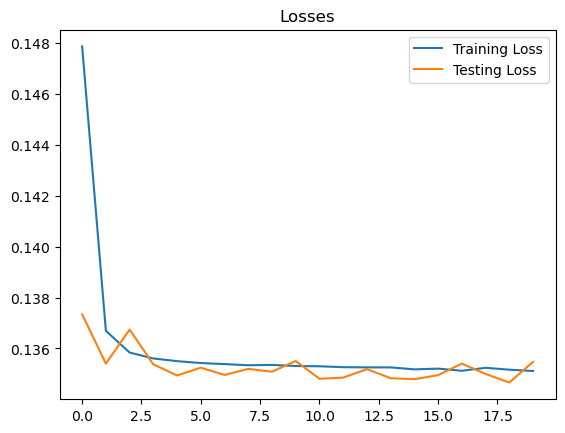

In [153]:
plt.plot(history.epoch, history.history['loss'], label="Training Loss")
plt.plot(history.epoch, history.history['val_loss'], label="Testing Loss")
plt.legend()
plt.title("Losses")
plt.show()

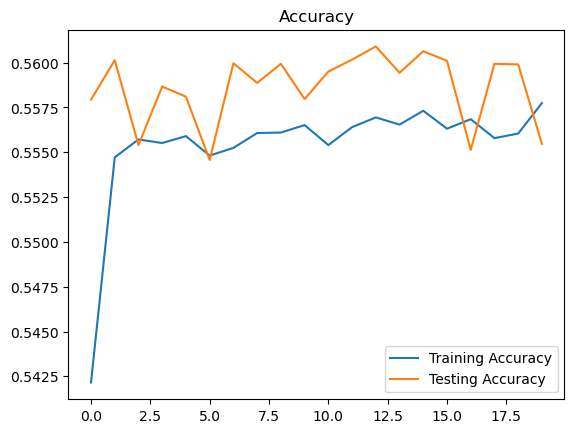

In [154]:
plt.plot(history.epoch, history.history['accuracy'], label="Training Accuracy")
plt.plot(history.epoch, history.history['val_accuracy'], label="Testing Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [155]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [156]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

938/938 [==============================] - 1s 1ms/step


Text(50.722222222222214, 0.5, 'True labels')

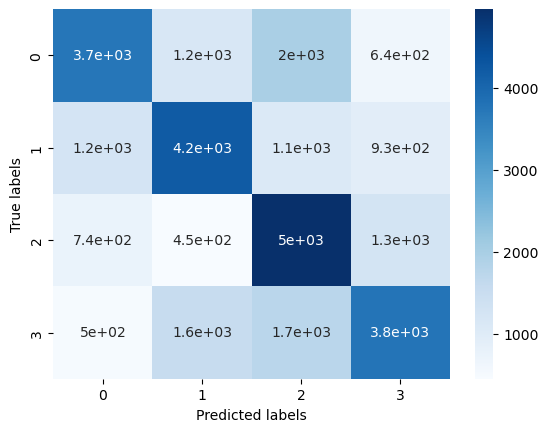

In [160]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

The error of the training data starts off very high but reduces over time which indicates that the model is learning from the data and previous iterations. Subsequently the testing error is lower than the training error which makes sense since the model has already been trained and so it should make fewer errors.

The accuracy also increases over time as the model learns from previous iterations. The testing accuracy is much higher than the training accuracy which is to be expected. However there might be some underfitting since the difference is very significant.